# INFORME COVID-19

### Mario Martínez García

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


35 35


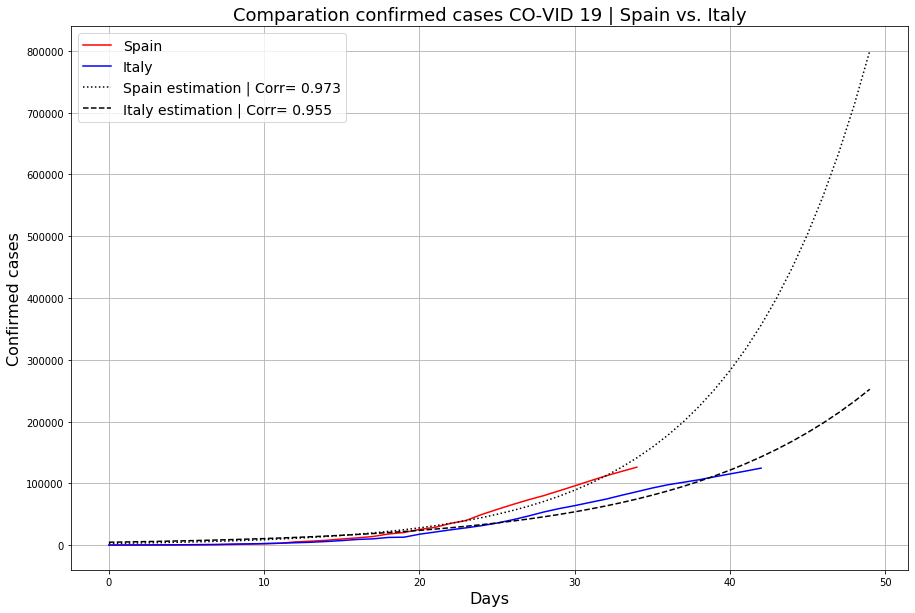

In [7]:
##https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy import optimize
from sklearn.metrics import r2_score
%matplotlib inline


#Cargamos los datos
df = pd.read_csv("data/time_series_covid19_confirmed_global_narrow.csv")

#Renombramos las columnas
df_covid =df.rename(columns={'Province/State':'PS','Country/Region':'Country'})

#Eliminamos las columnas que no utilizaremos
df_covid=df_covid.drop(['PS','Lat', 'Long'], axis=1)

#Eliminamos la fila 0 en la que aparecen letras irrelevamtes
df_covid=df_covid.drop([0], axis=0)

#Cambiamos a entero los valores de la columna Value
df_covid[['Value']] = df_covid[['Value']].astype(int)

#Corregimos los valores que están incorrectos
df_covid['Value'][(df_covid['Date']=='2020-03-12') & (df_covid['Country']=='Spain')]=3004
df_covid['Value'][(df_covid['Date']=='2020-03-12') & (df_covid['Country']=='Italy')]=12839



#---------------------------------------------ESPAÑA------------------------------------------------------

spain=df_covid[(df_covid['Country']=='Spain')]

#Inicio del brote decretado el día 1 de marzo con 84 contagios
spain=spain[(spain['Value']>=84)]
spain['Date']=np.arange(0,len(spain['Date']))
days_spain=spain['Date']
contagiados_spain=spain['Value'][::-1]



#---------------------------------------------ITALIA------------------------------------------------------
italy=df_covid[(df_covid['Country']=='Italy')]

#Inicio del brote decretado el día 22 de febrero con 62 contagios
italy=italy[(italy['Value']>=62)]
italy['Date']=np.arange(0,len(italy['Date']))
days_italy=italy['Date']
contagiados_italy=italy['Value'][::-1]

#Representación
plt.figure(figsize=(15,10)) 
plt.plot(days_spain,contagiados_spain, 'r', label='Spain')
plt.plot(days_italy,contagiados_italy, 'b', label= 'Italy')
plt.xlabel('Days', size=16)                                
plt.ylabel('Confirmed cases', size=16)                              
plt.title('Comparation confirmed cases CO-VID 19 | Spain vs. Italy', size=18)
plt.grid()




#Estimamos la curva de ajuste para ESPAÑA

pred=scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  days_spain,  contagiados_spain)
t=np.arange(0,50)
y_predsp=[]
for i in t:
    y_predsp.append(pred[0][0]*np.exp(pred[0][1]*i))
    
print(len(y_predsp[0:len(contagiados_spain)]), len(contagiados_spain))
cor_spain=r2_score(y_predsp[0:len(contagiados_spain)], contagiados_spain)    
plt.plot(t, pred[0][0]*np.exp(pred[0][1]*t),'black', linestyle=':', label='Spain estimation | Corr= {0:.3f}'.format(cor_spain))    




#Estimamos la curva de ajuste para ITALIA

pred_italy=scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  days_italy,  contagiados_italy)
t=np.arange(0,50)
y_predit=[]
for i in t:
    y_predit.append(pred_italy[0][0]*np.exp(pred_italy[0][1]*i))
    
cor_italy=r2_score(y_predit[0:len(contagiados_italy)], contagiados_italy)
plt.plot(t, pred_italy[0][0]*np.exp(pred_italy[0][1]*t),'black', linestyle='--', label='Italy estimation | Corr= {0:.3f}'.format(cor_italy))
plt.legend(prop={'size': 14})

Para el 30 de marzo tendremos más de 200000 contagiados, si en España vivimos 46 millones de personas supondrá que:

$\frac{200000}{46000000}=\frac{1}{230}$

Es decir, por cada 230 personas, tendremos a un infectado.

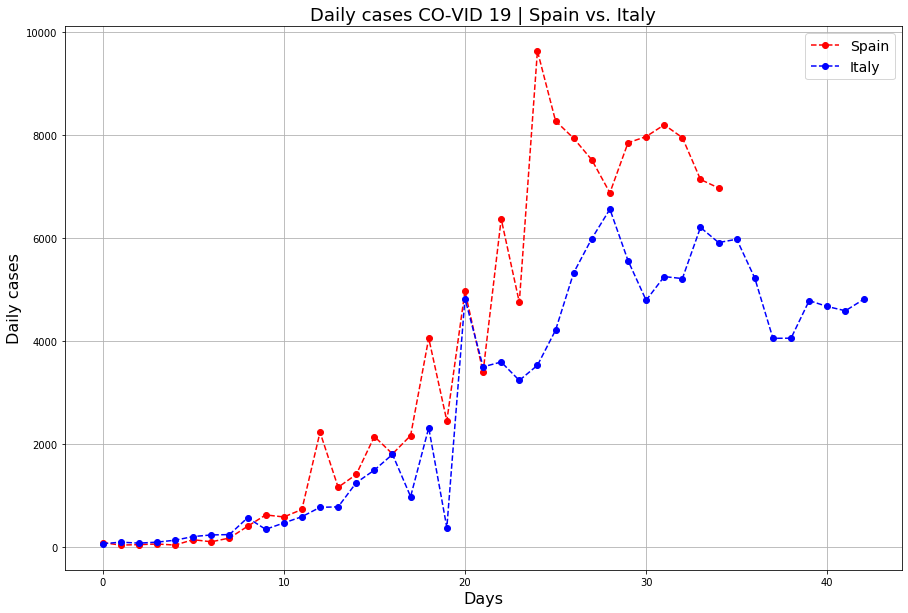

In [8]:
##--------------------------------------------POR DÍA-----------------------------------------------------------------

#Calculo de casos diarios en españa
daily_cases_spain=[]


for i in range(len(days_spain)):
    if i==0:
        daily_cases_spain.append(contagiados_spain.iloc[i]) 
    else:
        daily_cases_spain.append(contagiados_spain.iloc[i]-contagiados_spain.iloc[i-1])


#Calculo de casos diarios en italia
daily_cases_italy=[]

for i in range(len(days_italy)):
    if i==0:
        daily_cases_italy.append(contagiados_italy.iloc[i]) 
    else:
        daily_cases_italy.append(contagiados_italy.iloc[i]-contagiados_italy.iloc[i-1])

    
plt.figure(figsize=(15,10))     
plt.plot(days_spain, daily_cases_spain, marker='o', linestyle='--', color='r', label = "Spain")
plt.plot(days_italy, daily_cases_italy, marker='o', linestyle='--', color='b', label = "Italy")
plt.xlabel('Days', size=16)                                
plt.ylabel('Daily cases', size=16)                              
plt.title('Daily cases CO-VID 19 | Spain vs. Italy', size=18)
plt.grid()
plt.legend(prop={'size': 14})

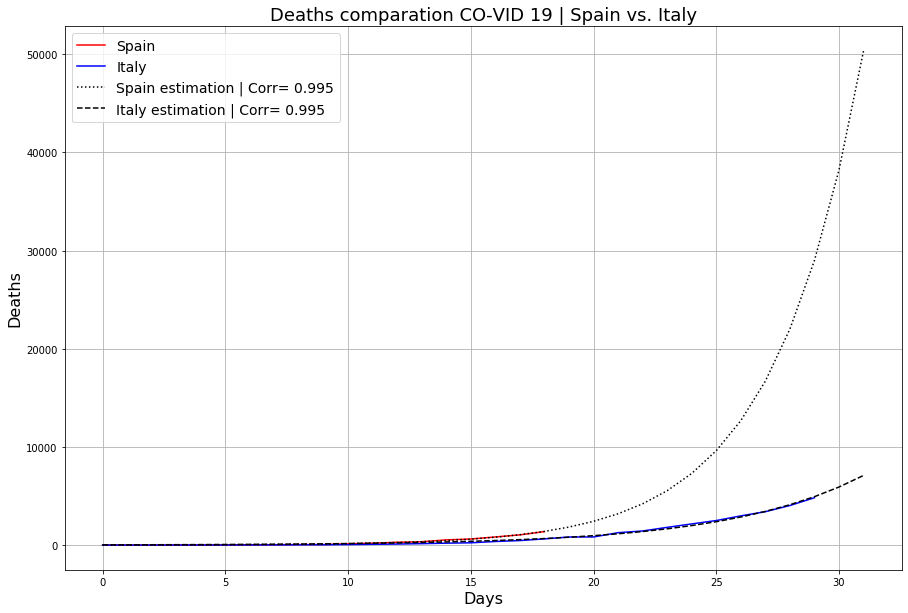

In [9]:
##-------------------------------------------------------MUERTOS-----------------------------------------------------------


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
from sklearn.metrics import r2_score
%matplotlib inline


#Cargamos los datos
df_death = pd.read_csv("data/time_series-ncov-Deaths.csv")
df_death.head()

#Renombramos las columnas
df_death =df_death.rename(columns={'Province/State':'PS','Country/Region':'Country'})

#Eliminamos las columnas que no utilizaremos
df_death=df_death.drop(['PS','Lat', 'Long'], axis=1)

#Eliminamos la fila 0 en la que aparecen letras irrelevamtes
df_death=df_death.drop([0], axis=0)

#Cambiamos a entero los valores de la columna Value
df_death[['Value']] = df_death[['Value']].astype(int)

#Corregimos los valores que están incorrectos
#df_covid['Value'][(df_covid['Date']=='2020-03-12') & (df_covid['Country']=='Spain')]=3004
#df_covid['Value'][(df_covid['Date']=='2020-03-12') & (df_covid['Country']=='Italy')]=12839



#---------------------------------------------ESPAÑA------------------------------------------------------

spaind=df_death[(df_death['Country']=='Spain')]


#Inicio del brote decretado el día 3 de marzo con 1 muerto
spaind=spaind[(spaind['Value']>0)]
spaind['Date']=np.arange(0,len(spaind['Date']))
days_spaind=spaind['Date']
deaths_spain=spaind['Value'][::-1]



#---------------------------------------------ITALIA------------------------------------------------------
italyd=df_death[(df_death['Country']=='Italy')]

#Inicio del brote decretado el día 21 de febrero con 1 muerto
italyd=italyd[(italyd['Value']>0)]
italyd['Date']=np.arange(0,len(italyd['Date']))
days_italyd=italyd['Date']
deaths_italy=italyd['Value'][::-1]


#Representación
plt.figure(figsize=(15,10)) 
plt.plot(days_spaind,deaths_spain, 'r', label='Spain')
plt.plot(days_italyd,deaths_italy, 'b', label= 'Italy')
plt.xlabel('Days', size=16)                                
plt.ylabel('Deaths', size=16)                              
plt.title('Deaths comparation CO-VID 19 | Spain vs. Italy', size=18)
plt.grid()



#Estimamos la curva de ajuste para ESPAÑA

pred=scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  days_spaind,  deaths_spain)
t=np.arange(0,32)
y_predsp=[]
for i in t:
    y_predsp.append(pred[0][0]*np.exp(pred[0][1]*i))
    
cor_spain=r2_score(y_predsp[0:len(deaths_spain)], deaths_spain)    
plt.plot(t, pred[0][0]*np.exp(pred[0][1]*t),'black', linestyle=':', label='Spain estimation | Corr= {0:.3f}'.format(cor_spain))    



#Estimamos la curva de ajuste para ITALIA

pred_italy=scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  days_italyd,  deaths_italy)
t=np.arange(0,32)
y_predit=[]
for i in t:
    y_predit.append(pred_italy[0][0]*np.exp(pred_italy[0][1]*i))
    
cor_italy=r2_score(y_predit[0:len(deaths_italy)], deaths_italy)
plt.plot(t, pred_italy[0][0]*np.exp(pred_italy[0][1]*t),'black', linestyle='--', label='Italy estimation | Corr= {0:.3f}'.format(cor_italy))
plt.legend(prop={'size': 14})




Para comienzos de Abril tendremos más de 50000 muertes, si en España vivimos 46 millones de personas supondrá que:

$\frac{50000}{46000000}=\frac{1}{920}$

Es decir, por cada 920 personas, tendremos a un muerto.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[3.2129798683557493, 3.9876988043493244, 4.949219231288489, 6.142583028748243, 7.623692647626542, 9.461929828780683, 11.743405751364088, 14.574994862220693, 18.08934134878922, 22.451072780903775, 27.86451199602003, 34.58324848676068, 42.92201765700627, 53.27144442355192, 66.1163418189954, 82.05842178354008, 101.84448201988678, 126.40138930845971, 156.87949805654634, 194.70653799868293, 241.6544953870765, 299.9226206835317, 372.2404512011748, 461.9956747332544, 573.3928238682552, 711.6502349365965, 883.2444980191726, 1096.2138491398716, 1360.5347168774201, 1688.5890625092206, 2095.7444059714244, 2601.07370862266, 3228.2488353115928, 4006.649449472608, 4972.739286812036, 6171.774278345917, 7659.9225388451505, 9506.895530345475, 11799.213656085998, 14644.259259774082, 18175.306890630265, 22557.766474129523, 27996.931846233947, 34747.59762681311, 43125.994929238106, 53524.605027701444, 66430.54492011602, 82448.38604786724, 102328.47510241813, 127002.08359090216]


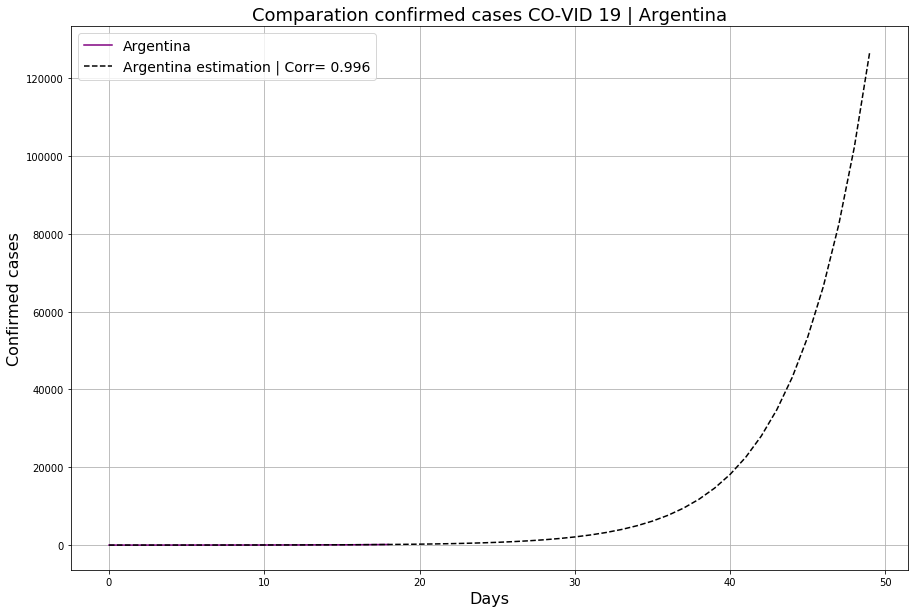

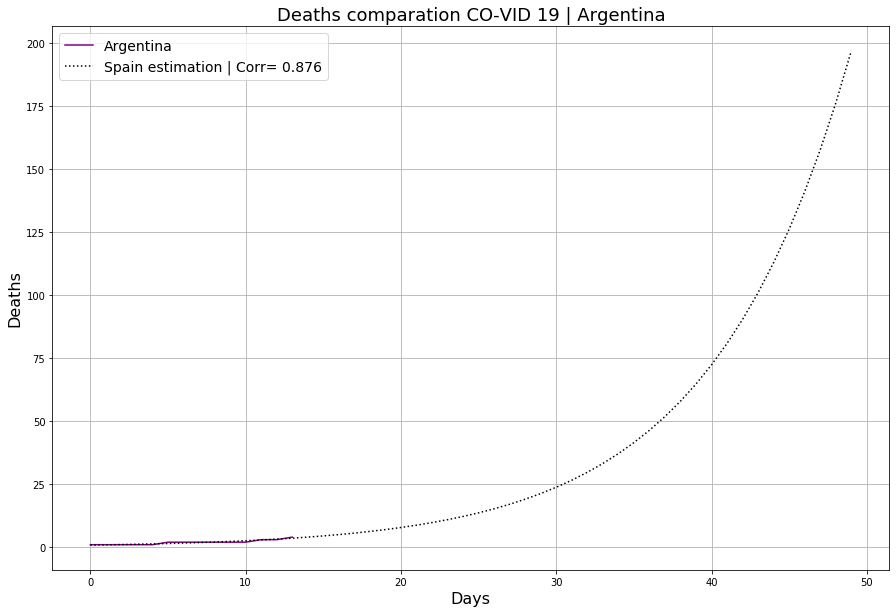

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
from sklearn.metrics import r2_score
%matplotlib inline


#Cargamos los datos
df = pd.read_csv("data/time_series-ncov-Confirmed.csv")

#Renombramos las columnas
df_covid =df.rename(columns={'Province/State':'PS','Country/Region':'Country'})

#Eliminamos las columnas que no utilizaremos
df_covid=df_covid.drop(['PS','Lat', 'Long'], axis=1)

#Eliminamos la fila 0 en la que aparecen letras irrelevamtes
df_covid=df_covid.drop([0], axis=0)

#Cambiamos a entero los valores de la columna Value
df_covid[['Value']] = df_covid[['Value']].astype(int)

#Corregimos los valores que están incorrectos
df_covid['Value'][(df_covid['Date']=='2020-03-12') & (df_covid['Country']=='Spain')]=3004
df_covid['Value'][(df_covid['Date']=='2020-03-12') & (df_covid['Country']=='Italy')]=12839

#---------------------------------------------CASOS CONFIRMADOS---------------------------------------------

#---------------------------------------------ARGENTINA------------------------------------------------------

argentina=df_covid[(df_covid['Country']=='Argentina')]

#Inicio del brote decretado el día 3 de marzo con 1 contagios
argentina=argentina[(argentina['Value']>0)]
argentina['Date']=np.arange(0,len(argentina['Date']))
days_argentina=argentina['Date']
contagiados_argentina=argentina['Value'][::-1]



#Representación
plt.figure(figsize=(15,10)) 
#plt.plot(days_spain,contagiados_spain, 'r', label='Spain')
plt.plot(days_argentina,contagiados_argentina, 'purple', label= 'Argentina')
plt.xlabel('Days', size=16)                                
plt.ylabel('Confirmed cases', size=16)                              
plt.title('Comparation confirmed cases CO-VID 19 | Argentina', size=18)
plt.grid()



#Estimamos la curva de ajuste para Argentina
pred_argentina=scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  days_argentina,  contagiados_argentina)
t=np.arange(0,50)
y_predar=[]
for i in t:
    y_predar.append(pred_argentina[0][0]*np.exp(pred_argentina[0][1]*i))
    
cor_argentina=r2_score(y_predar[0:len(contagiados_argentina)], contagiados_argentina)
plt.plot(t, pred_argentina[0][0]*np.exp(pred_argentina[0][1]*t),'black', linestyle='--', label='Argentina estimation | Corr= {0:.3f}'.format(cor_argentina))
plt.legend(prop={'size': 14})

print(y_predar)
#---------------------------------------------MUERTES---------------------------------------------

#---------------------------------------------ARGENTINA------------------------------------------------------



argentinad=df_death[(df_death['Country']=='Argentina')]

#El día 8 de marzo primera muerte
argentinad=argentinad[(argentinad['Value']>0)]
argentinad['Date']=np.arange(0,len(argentinad['Date']))
days_argentinad=argentinad['Date']
deaths_argentina=argentinad['Value'][::-1]


#Representación
plt.figure(figsize=(15,10)) 
plt.plot(days_argentinad,deaths_argentina, 'purple', label='Argentina')
plt.xlabel('Days', size=16)                                
plt.ylabel('Deaths', size=16)                              
plt.title('Deaths comparation CO-VID 19 | Argentina', size=18)
plt.grid()



#Estimamos la curva de ajuste para ESPAÑA

pred=scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  days_argentinad,  deaths_argentina)
t=np.arange(0,50)
y_predar=[]
for i in t:
    y_predar.append(pred[0][0]*np.exp(pred[0][1]*i))
    
cor_argentina=r2_score(y_predar[0:len(deaths_argentina)], deaths_argentina)    
plt.plot(t, pred[0][0]*np.exp(pred[0][1]*t),'black', linestyle=':', label='Spain estimation | Corr= {0:.3f}'.format(cor_argentina))
plt.legend(prop={'size': 14})


In [3]:
##https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy import optimize
from sklearn.metrics import r2_score
%matplotlib inline


#Cargamos los datos
df = pd.read_csv("data/time_series_covid19_confirmed_global_narrow.csv")
df.head(10)

,Province/State,Country/Region,Lat,Long,Date,Value,ISO 3166-1 Alpha 3-Codes,Region Code,Sub-region Code,Intermediate Region Code
0,#adm1+name,#country+name,#geo+lat,#geo+lon,#date,#affected+infected+value+num,#country+code,#region+main+code,#region+sub+code,#region+intermediate+code
1,NaN,Afghanistan,33.0,65.0,2020-04-04,299,AFG,142,34,NaN
2,NaN,Afghanistan,33.0,65.0,2020-04-03,281,AFG,142,34,NaN
3,NaN,Afghanistan,33.0,65.0,2020-04-02,273,AFG,142,34,NaN
4,NaN,Afghanistan,33.0,65.0,2020-04-01,237,AFG,142,34,NaN
5,NaN,Afghanistan,33.0,65.0,2020-03-31,174,AFG,142,34,NaN
6,NaN,Afghanistan,33.0,65.0,2020-03-30,170,AFG,142,34,NaN
7,NaN,Afghanistan,33.0,65.0,2020-03-29,120,AFG,142,34,NaN
8,NaN,Afghanistan,33.0,65.0,2020-03-28,110,AFG,142,34,NaN
9,NaN,Afghanistan,33.0,65.0,2020-03-27,110,AFG,142,34,NaN


In [ ]:
#Estimamos la curva de ajuste para ESPAÑA

pred=scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  days_spain,  contagiados_spain)
t=np.arange(0,32)
y_predsp=[]
for i in t:
    y_predsp.append(pred[0][0]*np.exp(pred[0][1]*i))
    
cor_spain=r2_score(y_predsp[0:len(contagiados_spain)], contagiados_spain)    
plt.plot(t, pred[0][0]*np.exp(pred[0][1]*t),'black', linestyle=':', label='Spain estimation | Corr= {0:.3f}'.format(cor_spain))